# 老照片说话demo

### 获取已修复图片

In [1]:
image_path = '/home/advance/dev/insightface/files/images/双人对话测试.png'

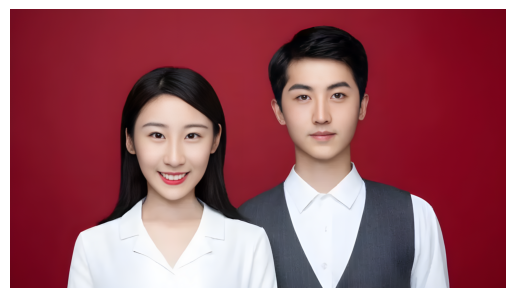

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    # 读取图片
    img = mpimg.imread(image_path)
    
    # 展示图片
    plt.imshow(img)
    plt.axis('off')  # 关闭坐标轴
    plt.show()
show_image(image_path)

### 根据人物对图片进行左右分割

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations
/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/advance/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4



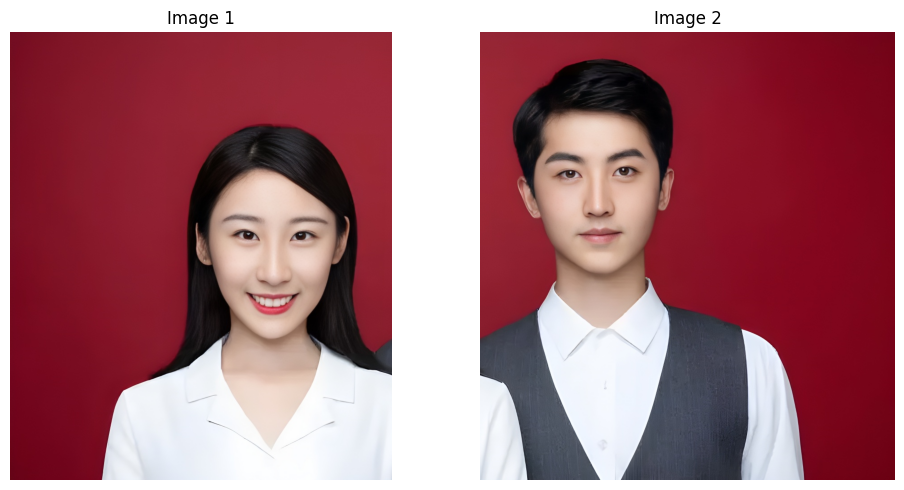

In [3]:
from did_a2v import *
from show_image import show_two_images
bboxes, img = get_face_bboxes(image_path)
image2video_list = list_single_image_faces_info(img, bboxes)

left_image = image2video_list[0][0]
right_image = image2video_list[1][0]
show_two_images(left_image, right_image)

### 创建文本信息A+A角色图像

In [4]:
A_image = left_image
A_text_list = ["老公，你用广西话说说：鹅鹅鹅，曲项向天歌。白毛浮绿水，红掌拨清波。","哈哈哈，广西话的腔调好有意思哦"]

### 创建文本信息B+B角色图像

In [5]:
B_image = right_image
B_text_list = ["好呀！鹅鹅鹅，曲项向天歌。白毛浮绿水，红掌拨清波。","是吧，搞笑的呢！"]

### 循环请求，并等待生成结果

In [6]:
from t2a.doubao import T2A
did_t2v = DIDT2V()
doubao_t2a = T2A()

{'host': 'openspeech.bytedance.com', 'appid': '7157313955', 'access_token': 'JjiWw6Ji7gxPLZ-1Ft18sV2BCPUcw-gf', 'cluster': 'volcano_tts', 'voice_type': 'BV115_streaming'}


### 得到a列表

In [7]:
a = []
for A_text in A_text_list:
    _, A_audio = doubao_t2a.convert(A_text, "BV423_streaming")
    video_path = did_t2v.run(A_image, A_audio)
    a.append(video_path)

音频文件临时保存路径====> /home/advance/dev/insightface/temp/audio_46dfd999-a136-41cc-bc22-d11f6448b900.mp3
upload image file success
upload audio file success
image_url===> https://xingge-ai.oss-cn-shenzhen.aliyuncs.com/images/2024-07-04/ef99586c8e584e7bbd8c4fb27beb93a2.png
audio_url===> https://xingge-ai.oss-cn-shenzhen.aliyuncs.com/voice/2024-07-04/290709b627654cff98ccc8027b3243b3.mp3
{"id":"tlk_YwvNEDLXGcetbvHetVhHm","created_at":"2024-07-04T08:58:13.580Z","created_by":"auth0|6434b92cfb407e0d68664b2b","status":"created","object":"talk"}
task_id=======>:tlk_YwvNEDLXGcetbvHetVhHm
{'user': {'features': ['stitch', 'no-watermark', 'clips:write', 'api-keys:write', 'subtitles', 'logo', 'translation', 'talks', 'logo', 'skip-moderation', 'skip-celebrity-detection'], 'stripe_customer_id': 'cus_NgtwQejpVq7fHK', 'stripe_plan_group': 'deid-enterprise', 'authorizer': 'basic', 'org_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'owner_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'id': 'auth0|6434b92cfb407e0d68664b2b', 'plan': 'de

### 得到B列表

In [8]:
print(B_text_list)

['好呀！鹅鹅鹅，曲项向天歌。白毛浮绿水，红掌拨清波。', '是吧，搞笑的呢！']


In [9]:
b = []
for B_text in B_text_list:
    _, B_audio = doubao_t2a.convert(B_text, "BV213_streaming")
    video_path = did_t2v.run(B_image, B_audio)
    b.append(video_path)

音频文件临时保存路径====> /home/advance/dev/insightface/temp/audio_dd2b2ab0-0016-4c04-bd23-f8ed19b66443.mp3
upload image file success
upload audio file success
image_url===> https://xingge-ai.oss-cn-shenzhen.aliyuncs.com/images/2024-07-04/73b73c1aafaa476f82c1037027f944aa.png
audio_url===> https://xingge-ai.oss-cn-shenzhen.aliyuncs.com/voice/2024-07-04/8ca4239fcc454e6faa410a6a8270fa29.mp3
{"id":"tlk_JAMsZRf_WrLsfE8IEmd9H","created_at":"2024-07-04T08:58:49.565Z","created_by":"auth0|6434b92cfb407e0d68664b2b","status":"created","object":"talk"}
task_id=======>:tlk_JAMsZRf_WrLsfE8IEmd9H
{'user': {'features': ['stitch', 'no-watermark', 'clips:write', 'api-keys:write', 'subtitles', 'logo', 'translation', 'talks', 'logo', 'skip-moderation', 'skip-celebrity-detection'], 'stripe_customer_id': 'cus_NgtwQejpVq7fHK', 'stripe_plan_group': 'deid-enterprise', 'authorizer': 'basic', 'org_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'owner_id': 'org_3F65YkhqT2ZOjNuEFRd38', 'id': 'auth0|6434b92cfb407e0d68664b2b', 'plan': 'de

### 展示D-ID生成结果

In [10]:
from IPython.display import Video
Video(video_path)

### 将列表中的元素与原图进行拼接，得到aA、bB列表

In [11]:
import mov_on_image

In [12]:
video_size_left = image2video_list[0][1]
desired_video_coord_on_image_left = image2video_list[0][2]
video_size_right = image2video_list[1][1]
desired_video_coord_on_image_right = image2video_list[1][2]

In [13]:
aA = []
for a_ in a:
    output_file_path = mov_on_image.process_v2(image_path, a_, video_size_left, desired_video_coord_on_image_left)
    print(output_file_path)
    aA.append(output_file_path)

Moviepy - Building video ./temp/composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdc.mp4.
MoviePy - Writing audio in composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdcTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdc.mp4



t:  58%|█████▊    | 105/180 [00:01<00:01, 62.91it/s, now=None]

Moviepy - Done !
Moviepy - video ready ./temp/composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdc.mp4
./temp/composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdc.mp4
Moviepy - Building video ./temp/composite_videof4128417-a283-475a-85e8-176ebb7712fd.mp4.
MoviePy - Writing audio in composite_videof4128417-a283-475a-85e8-176ebb7712fdTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_videof4128417-a283-475a-85e8-176ebb7712fd.mp4



t:  94%|█████████▍| 77/82 [00:01<00:00, 61.77it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/1a31c345-6c5b-4a4e-b9ba-f137a2d9a6d4.mp4, 2562000 bytes wanted but 0 bytes read,at frame 81/82, at time 3.24/3.26 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                            

Moviepy - Done !
Moviepy - video ready ./temp/composite_videof4128417-a283-475a-85e8-176ebb7712fd.mp4
./temp/composite_videof4128417-a283-475a-85e8-176ebb7712fd.mp4


In [14]:
bB = []
for b_ in b:
    output_file_path = mov_on_image.process_v2(image_path, b_, video_size_right, desired_video_coord_on_image_right)
    bB.append(output_file_path)

Moviepy - Building video ./temp/composite_video930cd595-0560-4edc-a417-fbb71e7c67cf.mp4.
MoviePy - Writing audio in composite_video930cd595-0560-4edc-a417-fbb71e7c67cfTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_video930cd595-0560-4edc-a417-fbb71e7c67cf.mp4



Moviepy - Done !
Moviepy - video ready ./temp/composite_video930cd595-0560-4edc-a417-fbb71e7c67cf.mp4
Moviepy - Building video ./temp/composite_video13c87f6e-f86c-40c9-8f06-c177bc484969.mp4.
MoviePy - Writing audio in composite_video13c87f6e-f86c-40c9-8f06-c177bc484969TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./temp/composite_video13c87f6e-f86c-40c9-8f06-c177bc484969.mp4



t:  92%|█████████▏| 49/53 [00:00<00:00, 63.20it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/a523a34d-e301-4b49-818d-04610cacaeee.mp4, 2778000 bytes wanted but 0 bytes read,at frame 52/53, at time 2.08/2.09 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready ./temp/composite_video13c87f6e-f86c-40c9-8f06-c177bc484969.mp4


### 展示一个合成的视频

In [15]:
Video(bB[0])

### aA列表中的视频与bB列表中的视频进行交叉合成

In [16]:
def generator(list:list):
    for element in list:
        yield element

In [17]:
aA_bB = []
gen_obj = generator(bB)
for aA_ in aA:
    aA_bB.append(aA_)
    aA_bB.append(next(gen_obj))

In [18]:
output_file_path = "concatenate_video2.mp4"
mov_on_image.concatenate_videos(aA_bB, output_file_path)

Moviepy - Building video concatenate_video2.mp4.
MoviePy - Writing audio in concatenate_video2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video concatenate_video2.mp4



t:  33%|███▎      | 159/480 [00:00<00:01, 238.91it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/composite_videodbc0e64a-7178-4812-b1f0-7f08dfbcdcdc.mp4, 5334000 bytes wanted but 0 bytes read,at frame 180/182, at time 7.20/7.24 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:  69%|██████▊   | 329/480 [00:01<00:00, 211.04it/s, now=None]WARNING:py.warnings:/home/advance/miniconda3/envs/insightface/lib/python3.8/site-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./temp/composite_video930cd595-0560-4edc-a417-fbb71e7c67cf.mp4, 5334000 bytes wanted but 0 bytes read,at frame 162/164, at time 6.48/6.53 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready concatenate_video2.mp4


'concatenate_video2.mp4'

In [19]:
len(aA_bB)

4

### 展示结果

In [20]:
Video(output_file_path)